In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings(action = 'ignore')


In [3]:
train_df = pd.read_csv('./채무불이행/train.csv').drop(columns = ['UID'])
test_df = pd.read_csv('./채무불이행/test.csv').drop(columns = ['UID'])

In [5]:
print(train_df)

                주거 형태      연간 소득 현재 직장 근속 연수  체납 세금 압류 횟수  개설된 신용계좌 수  \
0                  자가  1941337.5      10년 이상          0.0           9   
1                  월세  1979505.0      10년 이상          0.0           5   
2                  월세  1356381.0          4년          0.0          12   
3                  월세  1049017.5          6년          0.0          15   
4                  월세  4320217.5          2년          0.0          11   
...               ...        ...         ...          ...         ...   
9995  주택 담보 대출 (거주 중)  1339473.0      10년 이상          0.0           9   
9996  주택 담보 대출 (거주 중)  2297230.5          2년          0.0          11   
9997  주택 담보 대출 (거주 중)  1221523.5      10년 이상          0.0           9   
9998               자가  3343584.0      10년 이상          0.0          10   
9999  주택 담보 대출 (거주 중)  2175133.5          5년          0.0           5   

      신용 거래 연수   최대 신용한도  신용 문제 발생 횟수  마지막 연체 이후 경과 개월 수  개인 파산 횟수   대출 목적  \
0         13.4  400597.5            0        

<h1>Pre-Precessing</h1>

In [8]:
categorical_col = [
    '주거 형태',
    '현재 직장 근속 연수',
    '대출 목적',
    '대출 상환 기간'
]

#OneHotEncoder 초기화
encoder = OneHotEncoder(sparse_output=False, handle_unknown = 'ignore')

#훈련데이터에 대한 인코더 학습

encoder.fit(train_df[categorical_col])

train_encoded = encoder.transform(train_df[categorical_col])
test_encoded = encoder.transform(test_df[categorical_col])

# One-hot encoding 결과를 데이터프레임으로 변환
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_col))
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_col))

# 인코딩된 결과를 원래 데이터에 적용
train_df = pd.concat([train_df.drop(columns=categorical_col).reset_index(drop=True), train_encoded_df], axis=1)
test_df = pd.concat([test_df.drop(columns=categorical_col).reset_index(drop=True), test_encoded_df], axis=1)

<h1>Train Data Split</h1>

In [34]:
import sklearn
import xgboost

In [11]:
'''
#Train dataset 만 X_train, X_Val로 다시 구분
X_train, X_val, y_train, y_val = train_test_split(
    train_df.drop(columns=['채무 불이행 여부']), 
    train_df['채무 불이행 여부'], 
    test_size=0.2, 
    random_state=42
)
'''

In [116]:
'''
min_max scaled dataframe normalized_data
'''
X_train, X_val, y_train, y_val = train_test_split(
    normalized_df, 
    train_df['채무 불이행 여부'], 
    test_size=0.2, 
    random_state=42
)

<h1>모델 학습(XGB)-minmax_scaled</h1>

In [122]:
model = XGBClassifier(
    n_estimators = 150,
    max_depth = 5,
    learning_rate = 0.15,
    random_state=42,
    eval_metric="auc",
)

In [126]:
eval_set = [(X_train,y_train),(X_val,y_val)]
model.fit(
    normalized_df, train_df['채무 불이행 여부'],
    eval_set = eval_set,
    verbose = True
    )

[0]	validation_0-auc:0.72667	validation_1-auc:0.71408
[1]	validation_0-auc:0.74389	validation_1-auc:0.74254
[2]	validation_0-auc:0.74949	validation_1-auc:0.74468
[3]	validation_0-auc:0.75669	validation_1-auc:0.75248
[4]	validation_0-auc:0.76054	validation_1-auc:0.75613
[5]	validation_0-auc:0.76371	validation_1-auc:0.75836
[6]	validation_0-auc:0.76935	validation_1-auc:0.76183
[7]	validation_0-auc:0.77279	validation_1-auc:0.76483
[8]	validation_0-auc:0.77745	validation_1-auc:0.76915
[9]	validation_0-auc:0.78233	validation_1-auc:0.77413
[10]	validation_0-auc:0.78560	validation_1-auc:0.77879
[11]	validation_0-auc:0.78961	validation_1-auc:0.78124
[12]	validation_0-auc:0.79360	validation_1-auc:0.78543
[13]	validation_0-auc:0.79627	validation_1-auc:0.78739
[14]	validation_0-auc:0.79954	validation_1-auc:0.79073
[15]	validation_0-auc:0.80186	validation_1-auc:0.79414
[16]	validation_0-auc:0.80365	validation_1-auc:0.79592
[17]	validation_0-auc:0.80552	validation_1-auc:0.79808
[18]	validation_0-au

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

<h1>로지스틱회귀</h1>

In [67]:

# XGBoost Logistic Regression Classifier
model = XGBClassifier(
    n_estimators=300,
    max_depth=3,  # 로지스틱 회귀는 보통 깊이를 작게 설정
    learning_rate=0.1,
    objective="binary:logistic",  # 로지스틱 회귀 설정
    eval_metric="auc",  # 손실 함수
    random_state=42
)

In [71]:
eval_set = [(X_train,y_train),(X_val,y_val)]
model.fit(
    train_df.drop(columns =["채무 불이행 여부"]),train_df["채무 불이행 여부"],
    eval_set = eval_set,
    verbose = True
    )

[0]	validation_0-auc:0.67655	validation_1-auc:0.67472
[1]	validation_0-auc:0.70197	validation_1-auc:0.69439
[2]	validation_0-auc:0.69950	validation_1-auc:0.69585
[3]	validation_0-auc:0.70380	validation_1-auc:0.69728
[4]	validation_0-auc:0.71119	validation_1-auc:0.70034
[5]	validation_0-auc:0.71505	validation_1-auc:0.70476
[6]	validation_0-auc:0.71878	validation_1-auc:0.70757
[7]	validation_0-auc:0.72426	validation_1-auc:0.71382
[8]	validation_0-auc:0.72861	validation_1-auc:0.71651
[9]	validation_0-auc:0.72927	validation_1-auc:0.71687
[10]	validation_0-auc:0.73156	validation_1-auc:0.71868
[11]	validation_0-auc:0.73451	validation_1-auc:0.72370
[12]	validation_0-auc:0.73610	validation_1-auc:0.72651
[13]	validation_0-auc:0.73908	validation_1-auc:0.72914
[14]	validation_0-auc:0.74266	validation_1-auc:0.73165
[15]	validation_0-auc:0.74257	validation_1-auc:0.73077
[16]	validation_0-auc:0.74558	validation_1-auc:0.73388
[17]	validation_0-auc:0.74845	validation_1-auc:0.73767
[18]	validation_0-au

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

<h1>Prediction&Submission</h1>

In [133]:
# 채무 불이행 '확률'을 예측합니다.
preds = model.predict_proba(test_normalized_df)[:,1]
print(preds)

[0.5090913  0.36265308 0.45726207 ... 0.340692   0.16720912 0.6736564 ]


In [135]:
submit = pd.read_csv('./채무불이행/sample_submission.csv')

# 결과 저장
submit['채무 불이행 확률'] = preds
submit.to_csv('./채무불이행/submission.csv', encoding='UTF-8-sig', index=False)

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [186]:
display(train_df["채무 불이행 여부"])

0       0
1       0
2       1
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: 채무 불이행 여부, Length: 10000, dtype: int64

<h1>스케일링</h1>

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_X = train_df.drop(columns = ['채무 불이행 여부'])
original_columns = train_X.columns
# 각 컬럼별로 정규화
normalized_data = scaler.fit_transform(train_X)  # df는 원본 DataFrame
normalized_df = pd.DataFrame(normalized_data, columns = original_columns)


In [111]:
og_columns_test = test_df.columns
test_data = scaler.transform(test_df)
test_normalized_df = pd.DataFrame(test_data, columns=og_columns_test)

<h1>시각화 분석</h1>

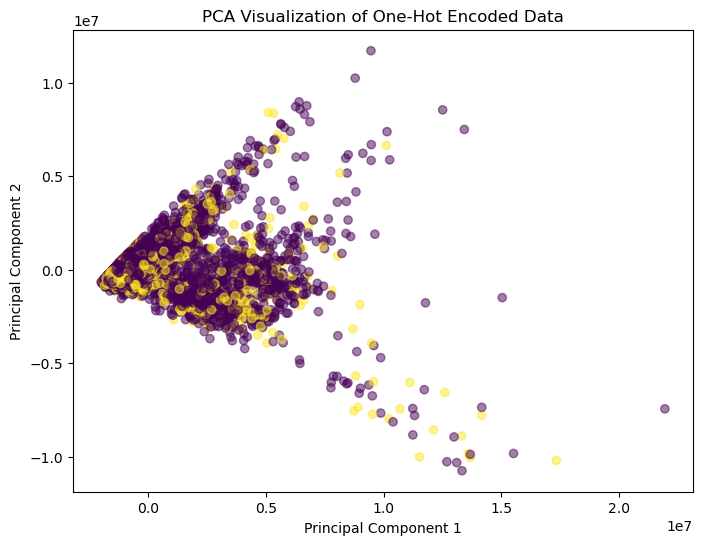

In [188]:
pca = PCA(n_components = 2)
train_pca_df_without = train_df.iloc[:,:-1].values
train_pca = pca.fit_transform(train_pca_df_without)
train_pca_df = pd.DataFrame(train_pca, columns = ["PC1","PC2"])
labels = train_df["채무 불이행 여부"]

plt.figure(figsize = (8,6))
plt.scatter(train_pca[:,0], train_pca[:,1], c = labels, alpha = 0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of One-Hot Encoded Data")
plt.show()

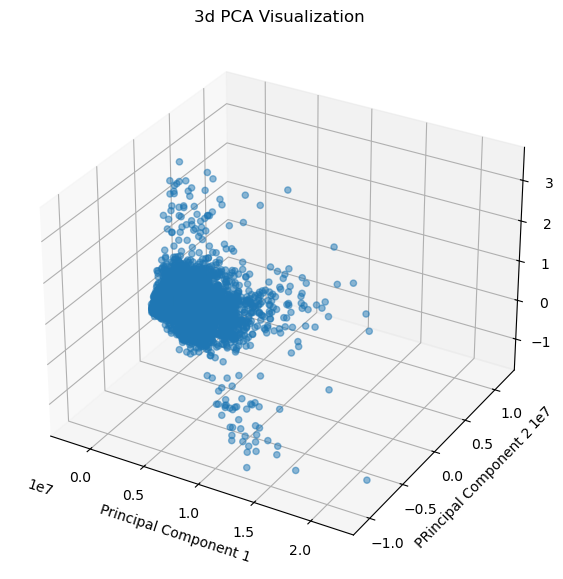

In [40]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components = 3)
train_pca_3d = pca.fit_transform(train_df)
train_pca_df_3d = pd.DataFrame(train_pca_3d, columns = ["PC1","PC2","PC3"])
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(train_pca_df_3d["PC1"], train_pca_df_3d["PC2"], train_pca_df_3d["PC3"], alpha = 0.5)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("PRincipal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3d PCA Visualization")

plt.show()

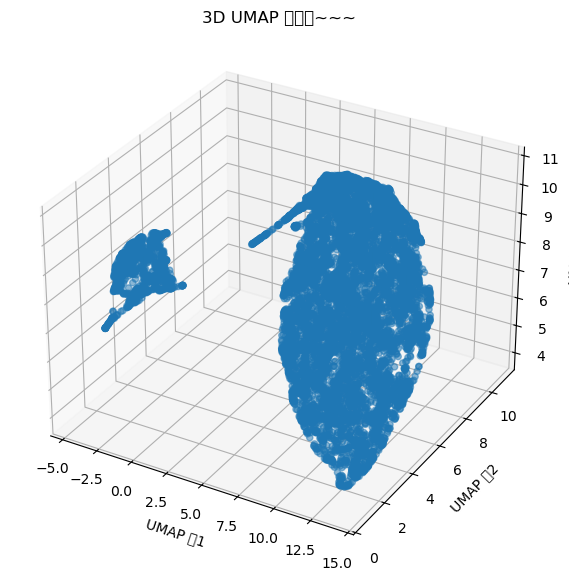

In [46]:
from mpl_toolkits.mplot3d import Axes3D
import umap
umap_3d = umap.UMAP(n_components = 3, random_state = 42)
train_umap_3d = umap_3d.fit_transform(train_df)

train_umap_3d_df = pd.DataFrame(train_umap_3d, columns = ["UMAP1", "UMAP2", "UMAP3"])

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(train_umap_3d_df["UMAP1"], train_umap_3d_df["UMAP2"], train_umap_3d_df["UMAP3"], alpha = 0.5)

ax.set_xlabel("UMAP 축1")
ax.set_ylabel("UMAP 축2")
ax.set_zlabel("UMAP 축3")

ax.set_title("3D UMAP 시각화~~~")
plt.show()

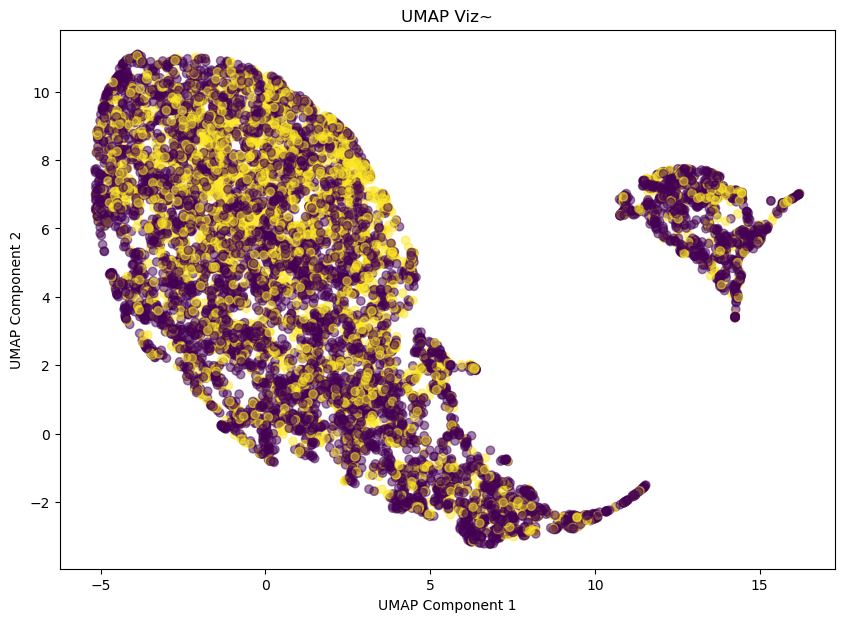

In [190]:
import umap
umap_2d = umap.UMAP(n_components = 2, random_state = 42)
train_df_without_last =train_df.iloc[:,:-1].values
train_umap_1 = umap_2d.fit_transform(train_df_without_last)

train_umap_df_1 = pd.DataFrame(train_umap_1, columns = ["UMAP1", "UMAP2"])


plt.figure(figsize = (10,7))

plt.scatter(train_umap_1[:,0], train_umap_1[:,1], c = labels, alpha = 0.5)

plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")

plt.title("UMAP Viz~")
plt.show()

In [91]:
original_columns

Index(['연간 소득', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '현재 대출 잔액',
       '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '채무 불이행 여부', '주거 형태_월세', '주거 형태_자가',
       '주거 형태_주택 담보 대출 (거주 중)', '주거 형태_주택 담보 대출 (비거주 중)', '현재 직장 근속 연수_10년 이상',
       '현재 직장 근속 연수_1년', '현재 직장 근속 연수_1년 미만', '현재 직장 근속 연수_2년',
       '현재 직장 근속 연수_3년', '현재 직장 근속 연수_4년', '현재 직장 근속 연수_5년', '현재 직장 근속 연수_6년',
       '현재 직장 근속 연수_7년', '현재 직장 근속 연수_8년', '현재 직장 근속 연수_9년', '대출 목적_결혼 자금',
       '대출 목적_고액 구매', '대출 목적_교육비', '대출 목적_기타', '대출 목적_부채 통합', '대출 목적_사업 대출',
       '대출 목적_소규모 사업 자금', '대출 목적_여행 자금', '대출 목적_의료비', '대출 목적_이사 비용',
       '대출 목적_자동차 구매', '대출 목적_주택 개보수', '대출 목적_주택 구매', '대출 목적_휴가 비용',
       '대출 상환 기간_단기 상환', '대출 상환 기간_장기 상환'],
      dtype='object')

In [95]:
normalized_df.columns

Index(['연간 소득', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '현재 대출 잔액',
       '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '채무 불이행 여부', '주거 형태_월세', '주거 형태_자가',
       '주거 형태_주택 담보 대출 (거주 중)', '주거 형태_주택 담보 대출 (비거주 중)', '현재 직장 근속 연수_10년 이상',
       '현재 직장 근속 연수_1년', '현재 직장 근속 연수_1년 미만', '현재 직장 근속 연수_2년',
       '현재 직장 근속 연수_3년', '현재 직장 근속 연수_4년', '현재 직장 근속 연수_5년', '현재 직장 근속 연수_6년',
       '현재 직장 근속 연수_7년', '현재 직장 근속 연수_8년', '현재 직장 근속 연수_9년', '대출 목적_결혼 자금',
       '대출 목적_고액 구매', '대출 목적_교육비', '대출 목적_기타', '대출 목적_부채 통합', '대출 목적_사업 대출',
       '대출 목적_소규모 사업 자금', '대출 목적_여행 자금', '대출 목적_의료비', '대출 목적_이사 비용',
       '대출 목적_자동차 구매', '대출 목적_주택 개보수', '대출 목적_주택 구매', '대출 목적_휴가 비용',
       '대출 상환 기간_단기 상환', '대출 상환 기간_장기 상환'],
      dtype='object')

In [97]:
normalized_df['채무 불이행 여부']

0       0.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: 채무 불이행 여부, Length: 10000, dtype: float64

In [101]:
normalized_df.drop(columns=['채무 불이행 여부'])

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,...,대출 목적_소규모 사업 자금,대출 목적_여행 자금,대출 목적_의료비,대출 목적_이사 비용,대출 목적_자동차 구매,대출 목적_주택 개보수,대출 목적_주택 구매,대출 목적_휴가 비용,대출 상환 기간_단기 상환,대출 상환 기간_장기 상환
0,0.098674,0.0,0.212121,0.161926,0.017243,0.000000,0.272727,0.333333,0.269054,0.057131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.100924,0.0,0.090909,0.199125,0.015525,0.000000,0.125000,0.000000,0.723729,0.016408,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.064188,0.0,0.303030,0.280088,0.021168,0.142857,0.840909,1.000000,0.147719,0.123570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.046067,0.0,0.393939,0.192560,0.017714,0.142857,0.250000,0.333333,0.165279,0.104708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.238920,0.0,0.272727,0.439825,0.038536,0.000000,0.363636,0.000000,0.843476,0.020017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.063191,0.0,0.212121,0.277899,0.013732,0.000000,0.772727,0.000000,0.072179,0.044859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,0.119655,0.0,0.272727,0.487965,0.017209,0.000000,0.079545,0.000000,0.254925,0.088044,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9997,0.056237,0.0,0.212121,0.527352,0.035438,0.000000,0.159091,0.000000,0.625213,0.044828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9998,0.181343,0.0,0.242424,0.312910,0.031177,0.000000,0.284091,0.000000,0.307811,0.035297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
normalized

In [198]:
print(normalized_df)

         연간 소득  체납 세금 압류 횟수  개설된 신용계좌 수  신용 거래 연수   최대 신용한도  신용 문제 발생 횟수  \
0     0.098674          0.0    0.212121  0.161926  0.017243     0.000000   
1     0.100924          0.0    0.090909  0.199125  0.015525     0.000000   
2     0.064188          0.0    0.303030  0.280088  0.021168     0.142857   
3     0.046067          0.0    0.393939  0.192560  0.017714     0.142857   
4     0.238920          0.0    0.272727  0.439825  0.038536     0.000000   
...        ...          ...         ...       ...       ...          ...   
9995  0.063191          0.0    0.212121  0.277899  0.013732     0.000000   
9996  0.119655          0.0    0.272727  0.487965  0.017209     0.000000   
9997  0.056237          0.0    0.212121  0.527352  0.035438     0.000000   
9998  0.181343          0.0    0.242424  0.312910  0.031177     0.000000   
9999  0.112457          0.0    0.090909  0.413567  0.002281     0.000000   

      마지막 연체 이후 경과 개월 수  개인 파산 횟수  현재 대출 잔액  현재 미상환 신용액  ...  대출 목적_소규모 사업 자금  \
0     

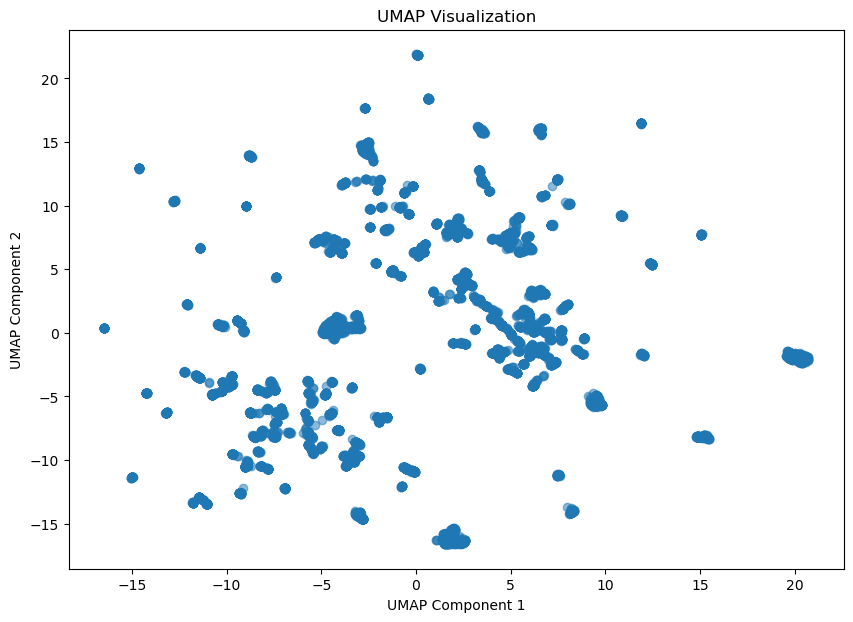

In [194]:
import umap
labels = train_df["채무 불이행 여부"]
umap_2d = umap.UMAP(n_components = 2, random_state = 42, n_neighbors = 40, min_dist = 0.1)
train_umap = umap_2d.fit_transform(normalized_df_without_last)

train_umap_df = pd.DataFrame(train_umap, columns = ["UMAP1", "UMAP2"])

plt.figure(figsize = (10,7))

plt.scatter(train_umap_df["UMAP1"], train_umap_df["UMAP2"], alpha = 0.5)

plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")

plt.title("UMAP Visualization")
plt.show()

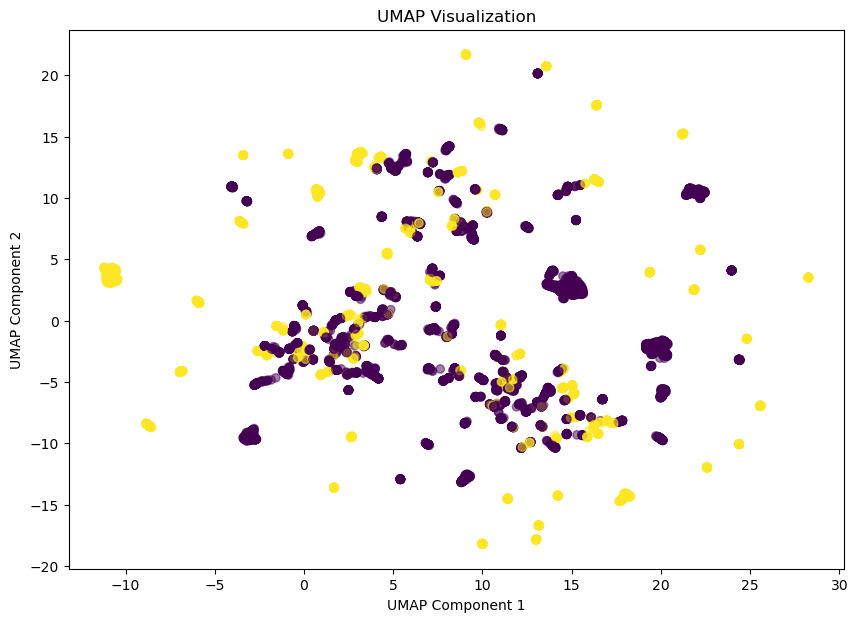

In [200]:

umap_2d = umap.UMAP(n_components = 2, random_state = 42, n_neighbors = 30, min_dist = 0.1)
train_umap = umap_2d.fit_transform(normalized_df_without_last)

train_umap_df = pd.DataFrame(train_umap, columns = ["UMAP1", "UMAP2"])

plt.figure(figsize = (10,7))

plt.scatter(train_umap[:,0], train_umap[:,1], c = labels, alpha = 0.5)

plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")

plt.title("UMAP Visualization")
plt.show()

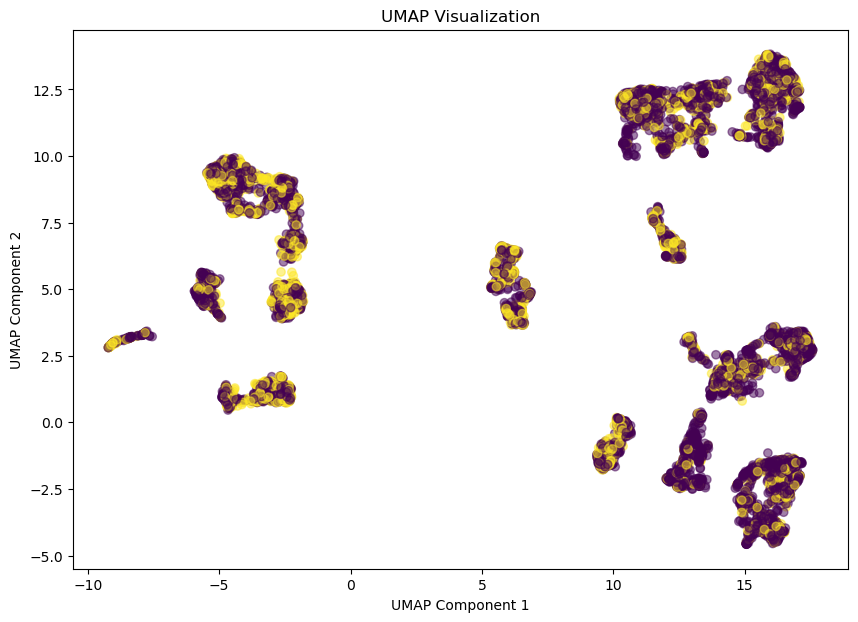

In [267]:

umap_2d = umap.UMAP(n_components = 2, random_state = 42, n_neighbors = 20, min_dist = 0.1)
train_umap = umap_2d.fit_transform(normalized_df_without_last)

train_umap_df = pd.DataFrame(train_umap, columns = ["UMAP1", "UMAP2"])

plt.figure(figsize = (10,7))

plt.scatter(train_umap[:,0], train_umap[:,1], c = labels, alpha = 0.5)

plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")

plt.title("UMAP Visualization")
plt.show()

In [208]:
train = pd.read_csv('./채무불이행/train.csv', encoding = "utf-8-sig")

<h1>LabelEncoder</h1>

In [213]:
from sklearn.preprocessing import LabelEncoder
living_form = [i for i in train['주거 형태']]
living_encoder = LabelEncoder()
en_living_form = living_encoder.fit_transform(living_form)

In [217]:
purpose = [i for i in train['대출 목적']]
pp_encoder = LabelEncoder()
en_purpose = pp_encoder.fit_transform(purpose)

In [215]:
period = [i for i in train['대출 상환 기간']]
p_encoder = LabelEncoder()
en_period = p_encoder.fit_transform(period)

In [219]:
def years(value):
  if '10년 이상' in str(value):
    return 11
  elif '1년 미만'  in str(value):
    return 0
  elif isinstance(value, str)  and '년' in value:
    year = int(value.replace('년', '').strip())
    return year
  else:
    return value

working_year = train['현재 직장 근속 연수'].apply(years)
working_year

0       11
1       11
2        4
3        6
4        2
        ..
9995    11
9996     2
9997    11
9998    11
9999     5
Name: 현재 직장 근속 연수, Length: 10000, dtype: int64

In [221]:
Train_df = train
Train_df['주거 형태'] = en_living_form
Train_df['대출 목적'] = en_purpose
Train_df['대출 상환 기간'] = en_period
Train_df['현재 직장 근속 연수'] = working_year
Train_df.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,1,1941337.5,11,0.0,9,13.4,400597.5,0,24,1,4,0,390903.0,225457.5,8806.5,767,0
1,TRAIN_00001,0,1979505.0,11,0.0,5,15.1,360679.5,0,11,0,4,0,1002184.5,64749.0,24961.5,767,0
2,TRAIN_00002,0,1356381.0,4,0.0,12,18.8,491770.5,1,74,3,4,0,227775.0,487644.0,12069.0,800,1
3,TRAIN_00003,0,1049017.5,6,0.0,15,14.8,411546.0,1,22,1,4,0,251383.5,413211.0,31749.0,796,1
4,TRAIN_00004,0,4320217.5,2,0.0,11,26.1,895288.5,0,32,0,4,1,1163176.5,78991.5,5862.0,751,0


In [231]:
print(Train_df.iloc[:,-1])

0       0
1       0
2       1
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: 채무 불이행 여부, Length: 10000, dtype: int64


In [251]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#Train_df = Train_df.drop(columns = ["UID"])
original_columns = Train_df.columns
# 각 컬럼별로 정규화

normalized_data = scaler.fit_transform(Train_df)  # df는 원본 DataFrame


In [243]:
display(normalized_data)

array([[0.33333333, 0.09867375, 1.        , ..., 0.0573435 , 0.82043344,
        0.        ],
       [0.        , 0.10092391, 1.        , ..., 0.16253675, 0.82043344,
        0.        ],
       [0.        , 0.06418771, 0.36363636, ..., 0.07858727, 0.92260062,
        1.        ],
       ...,
       [0.66666667, 0.0562372 , 1.        , ..., 0.07446549, 0.71517028,
        0.        ],
       [0.33333333, 0.18134301, 1.        , ..., 0.16648272, 0.6006192 ,
        0.        ],
       [0.66666667, 0.11245716, 0.45454545, ..., 0.082543  , 0.53869969,
        0.        ]])

In [257]:
normalized_df = pd.DataFrame(normalized_data, columns = original_columns)
normalized_df_without_last = normalized_df.iloc[:,:-1].values
#labels = normalized_df.iloc[:,-1].values
display(normalized_df)

,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,0.333333,0.098674,1.000000,0.0,0.212121,0.161926,0.017243,0.000000,0.272727,0.333333,0.307692,0.0,0.269054,0.057131,0.057344,0.820433,0.0
1,0.000000,0.100924,1.000000,0.0,0.090909,0.199125,0.015525,0.000000,0.125000,0.000000,0.307692,0.0,0.723729,0.016408,0.162537,0.820433,0.0
2,0.000000,0.064188,0.363636,0.0,0.303030,0.280088,0.021168,0.142857,0.840909,1.000000,0.307692,0.0,0.147719,0.123570,0.078587,0.922601,1.0
3,0.000000,0.046067,0.545455,0.0,0.393939,0.192560,0.017714,0.142857,0.250000,0.333333,0.307692,0.0,0.165279,0.104708,0.206734,0.910217,1.0
4,0.000000,0.238920,0.181818,0.0,0.272727,0.439825,0.038536,0.000000,0.363636,0.000000,0.307692,1.0,0.843476,0.020017,0.038170,0.770898,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.666667,0.063191,1.000000,0.0,0.212121,0.277899,0.013732,0.000000,0.772727,0.000000,0.307692,0.0,0.072179,0.044859,0.040612,0.783282,0.0
9996,0.666667,0.119655,0.181818,0.0,0.272727,0.487965,0.017209,0.000000,0.079545,0.000000,0.846154,1.0,0.254925,0.088044,0.347069,0.634675,0.0
9997,0.666667,0.056237,1.000000,0.0,0.212121,0.527352,0.035438,0.000000,0.159091,0.000000,0.307692,1.0,0.625213,0.044828,0.074465,0.715170,0.0
9998,0.333333,0.181343,1.000000,0.0,0.242424,0.312910,0.031177,0.000000,0.284091,0.000000,0.307692,0.0,0.307811,0.035297,0.166483,0.600619,0.0


In [261]:
print(Train_df.iloc[:,-1])

0       0
1       0
2       1
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: 채무 불이행 여부, Length: 10000, dtype: int64


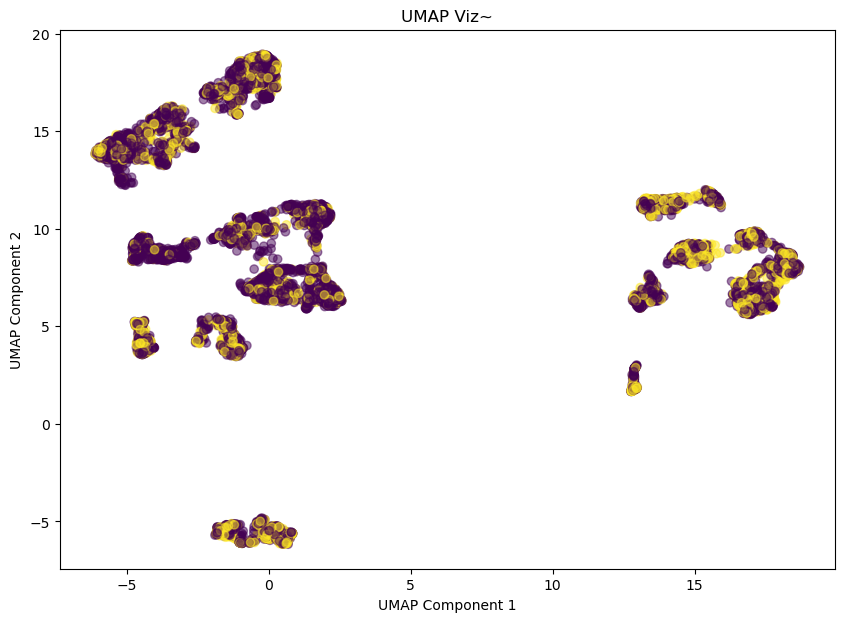

In [263]:
import umap
umap_2d = umap.UMAP(n_components = 2, random_state = 42 , n_neighbors = 30, min_dist  = 0.1)
Train_df_without_last = Train_df.iloc[:,:-1]
Train_df_without_last = Train_df.iloc[:,1:]
Train_umap_1 = umap_2d.fit_transform(normalized_df_without_last)

#Train_umap_df_1 = pd.DataFrame(Train_umap_1, columns = ["UMAP1", "UMAP2"])
labels = Train_df.iloc[:,-1]

plt.figure(figsize = (10,7))

plt.scatter(Train_umap_1[:,0], Train_umap_1[:,1], c = labels, alpha = 0.5)

plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")

plt.title("UMAP Viz~")
plt.show()